## 3. OBTENCIÓN DEL MODELO PREDICTIVO (CART)

Se obtiene el árbol de decisión CART y se evalúa. 

In [33]:
#IMPORTAR LIBRERÍAS
import numpy as np #Numpy
import pandas as pd #Pandas 
import matplotlib.pyplot as plt #Matplotlib
import os
from sklearn import preprocessing #metodos de machine learning optimizados y validados
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier #RANDOM FOREST
from sklearn import tree #CART
from subprocess import call
from sklearn.tree import export_graphviz #Graficar árboles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.image as mpimg
import pydot

In [34]:
# Dar permisos a Colab para acceder a directorios Google Drive
from google.colab import drive
drive.mount('/content/drive')

BASE_FOLDER = '/content/drive/My Drive/TFM/DATASETS/Dataset_TFM/CSV/' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#CARGAR DATASET
dfp_global = pd.read_csv(BASE_FOLDER + 'dfp_global.csv')

In [36]:
#Guardar dataset completo según 70-30% (train-test)
dataset_train = dfp_global.iloc[:620000, :]
dataset_test = dfp_global.iloc[620001:, :]

In [44]:
# Forma de los sets entrenamiento y test
print('Tamaño dataset entrenamiento :',dataset_train.shape)
print('Tamaño dataset test :',dataset_test.shape)

Tamaño dataset entrenamiento : (620000, 10)
Tamaño dataset test : (257121, 10)


In [37]:
#Separar atributos y clases

#Dataset_train
dataset_train_x = dataset_train.drop(columns=['failure'],axis=1)
dataset_train_y = dataset_train['failure']

#Dataset_test
dataset_test_x = dataset_test.drop(columns=['failure'],axis=1)
dataset_test_y = dataset_test['failure']

In [38]:
muestras = dataset_train_y.value_counts()
print('Tamaño dataset entrenamiento: ', muestras[0], muestras[1])

Tamaño dataset entrenamiento:  619458 542


In [39]:
#PARÁMETROS ÁRBOL DE CLASIFICACIÓN CART

#Criterio
criterion=['gini', 'entropy']
#Nº características a considerar en cada división
max_features = [None, 'sqrt']
#Máximo número de niveles en el árbol
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200, None]
#Estrategia usada para dividir cada nodo
splitter = ['best', 'random']
#Número mínimo de muestras requerido para dividir un nodo
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
#Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 3, 4]

#Pesos a las clases
class_weight=[{1:1}, {1:100}, {1:200}, {1:300}, {1:600}, {1:800}, {1:1000}, {1:1200}]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'splitter': splitter,
               'criterion': criterion,
               'class_weight':class_weight
               }


In [40]:
random_grid

{'class_weight': [{1: 1},
  {1: 100},
  {1: 200},
  {1: 300},
  {1: 600},
  {1: 800},
  {1: 1000},
  {1: 1200}],
 'criterion': ['gini', 'entropy'],
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200, None],
 'max_features': [None, 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [1, 2, 5, 10, 15, 20, 30],
 'splitter': ['best', 'random']}

In [42]:
 #Búsqueda y entrenamiento de un nuevo clasificador CART
 #en los parámetros encontrados de la búsqueda aleatoria
 rf_base = tree.DecisionTreeClassifier()

 #Método para búsqueda aleatoria en hiperparámetros
 rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)
 
 rf_random.fit(dataset_train_x,dataset_train_y)

#Resultados
#  rf_random.best_params_
#  Nota: los valores de los hiper-parámetros pueden cambiar
#  cada vez que se compile el código, por este motivo,
#  no se muestran

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'class_weight': [{1: 1}, {1: 100},
                                                         {1: 200}, {1: 300},
                                                         {1: 600}, {1: 800},
                                                         {1: 1000}, {1: 1200}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200, None],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'splitter': ['best', 'random

In [ ]:
#Aplicar modelo con hiperparámetros optimizados
#Clasificador CART
model_cart = tree.DecisionTreeClassifier(criterion='entropy', 
                                         class_weight={1:600}, 
                                         max_depth=50,
                                         max_features=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         splitter='random')

In [ ]:
#modelo CART
model_cart

DecisionTreeClassifier(class_weight={1: 600}, criterion='entropy', max_depth=50,
                       splitter='random')

In [ ]:
#Entrenamiento CART
model_cart.fit(dataset_train_x,dataset_train_y)

# Predicciones de las clases
cart_predict_test = model_cart.predict(dataset_test_x)

# Medidas de clasificación en CART
cart_accuracy = accuracy_score(dataset_test_y, cart_predict_test)
cart_precision = precision_score(dataset_test_y, cart_predict_test)
cart_recall = recall_score(dataset_test_y, cart_predict_test)
cart_f1 = f1_score(dataset_test_y, cart_predict_test)
cart_matrix = confusion_matrix(dataset_test_y, cart_predict_test)
cart_table = classification_report(dataset_test_y, cart_predict_test)

print("Exactitud: ", cart_accuracy)
print("Precisión: ", cart_precision)
print("Sensibilidad: ", cart_recall)
print("F1: ", cart_f1)
print("Matriz de confusión: ", cart_matrix)

Exactitud:  0.9993893925428106
Precisión:  0.6037735849056604
Sensibilidad:  0.6368159203980099
F1:  0.6198547215496367
Matriz de confusión:  [[256836     84]
 [    73    128]]


In [54]:
#Visualizar árbol de decisión CART (total)
# tree.plot_tree(model_cart, max_depth=None)

[Text(0.5119047619047619, 0.9, 'comp <= 2.445\nentropy = 0.929\nsamples = 620000\nvalue = [619458, 325200]'),
 Text(0.2619047619047619, 0.7, 'comp <= 1.128\nentropy = 0.792\nsamples = 619001\nvalue = [618679, 193200]'),
 Text(0.09523809523809523, 0.5, 'comp <= 0.66\nentropy = 0.53\nsamples = 618453\nvalue = [618312, 84600]'),
 Text(0.047619047619047616, 0.3, 'entropy = 0.0\nsamples = 617951\nvalue = [617951, 0]'),
 Text(0.14285714285714285, 0.3, 'volt <= 0.37\nentropy = 0.04\nsamples = 502\nvalue = [361, 84600]'),
 Text(0.09523809523809523, 0.1, '\n  (...)  \n'),
 Text(0.19047619047619047, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'rotate <= 0.242\nentropy = 0.033\nsamples = 548\nvalue = [367, 108600]'),
 Text(0.3333333333333333, 0.3, 'errorID <= 4.176\nentropy = 0.004\nsamples = 7\nvalue = [1, 3600]'),
 Text(0.2857142857142857, 0.1, '\n  (...)  \n'),
 Text(0.38095238095238093, 0.1, '\n  (...)  \n'),
 Text(0.5238095238095238, 0.3, 'volt <= 0.755\nentropy = 0.033\nsamples =

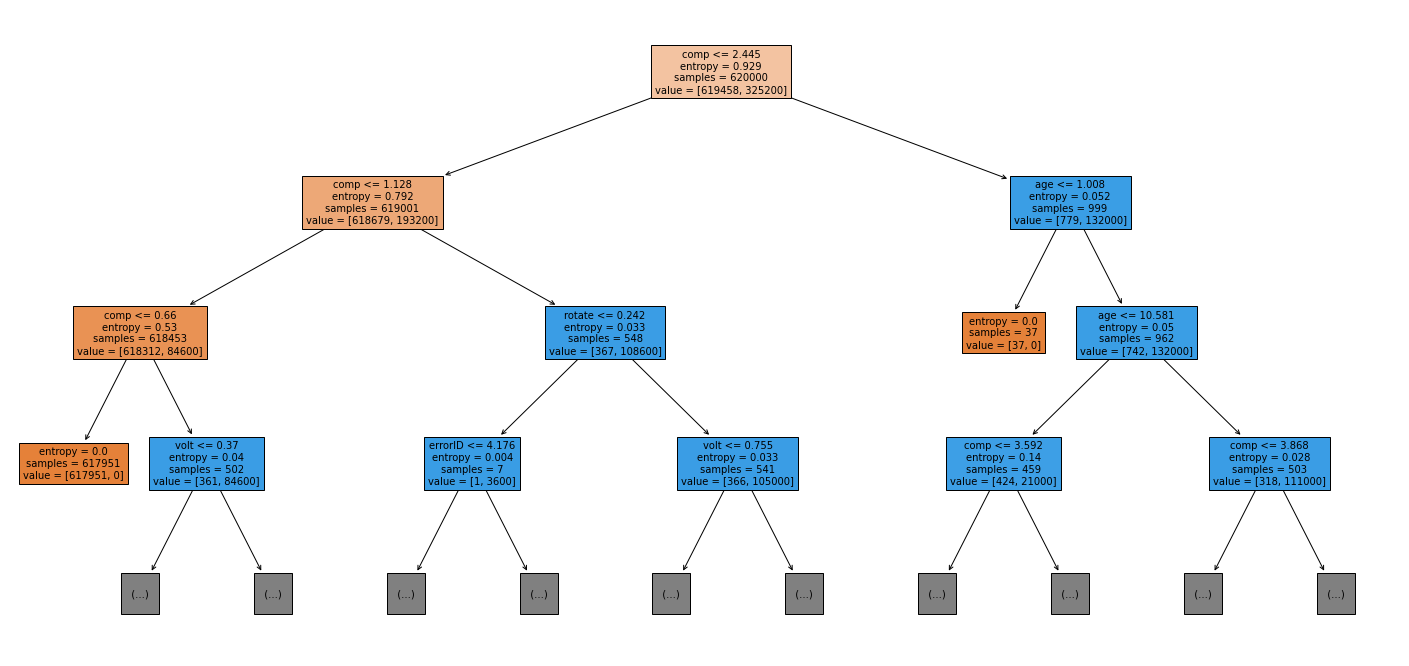

In [ ]:
#Visualizar inicio del árbol de decisión CART
plt.figure(figsize=(25,12))
tree.plot_tree(model_cart, feature_names=dataset_train_x.columns, max_depth=3, filled=True, fontsize=10)

In [ ]:
#Valor de importancia "gini" normalizado
imp = model_cart.feature_importances_
print(imp)

[8.24541050e-04 3.74898589e-03 2.21270785e-03 1.52162949e-03
 2.17218627e-03 1.65602211e-03 1.79289047e-03 9.86055928e-01
 1.51085994e-05]


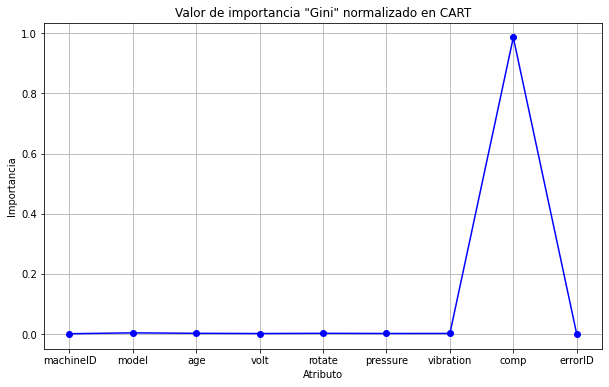

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dataset_train_x.columns, imp, 'bo-', label='green') #imp. gini
plt.title('Valor de importancia "Gini" normalizado en CART')
plt.xlabel("Atributo")
plt.ylabel("Importancia")
plt.grid()

In [48]:
#REPRESENTAR ÁRBOL DE DECISIÓN
# Obtener árbol 1 del bosque
tree = model_cart
# Exportar la imagen a un archivo .dot
export_graphviz(tree, out_file = 'tree.dot', feature_names=dataset_train_x.columns, rounded = True, precision = 1)
# Usar el archivo de puntos para crear un gráfico
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Escribir gráfico en un archivo .png
graph.write_png('tree.png')

In [49]:
#Leer imagen
img = mpimg.imread('tree.png')

In [55]:
#Representar
plt.figure(figsize=(200,200))
plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.